# Mathematical representation of an audio signal

## Setup

Include necessery libraries and packages

In [1]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

Declare global variables

In [2]:
FRAME_SIZE = 2048
HOP_SIZE = 512

Load audio data

In [3]:
file = "audio/ErikSatie__GymnopedieNo1(cropped).wav"
NAME = "Erik Satie - Gymnopedie No 1"

In [4]:
ipd.Audio(data=file)

## Processing the signal

Load signal with librosa 

In [5]:
signal, sr = librosa.load(file)

Information about signal

In [6]:
print(f"Duration of signal in seconds: {(1/sr)*len(signal):.2f}")
print(f"Duration of 1 sample in seconds: {(1/sr):.6f}")
print(f"Amount of samples: {len(signal)}")

Duration of signal in seconds: 32.03
Duration of 1 sample in seconds: 0.000045
Amount of samples: 706233


Crop the signal (optional)

In [7]:
start = 0
end = 20
start_sample = librosa.time_to_samples(start, sr=sr)
end_sample = librosa.time_to_samples(end, sr=sr)
signal = signal[start_sample:end_sample]
print(f"Duration of signal in seconds: {(1/sr)*len(signal):.2f}")
print(f"Amount of samples: {len(signal)}")

Duration of signal in seconds: 20.00
Amount of samples: 441000


### Visualization of the waveform

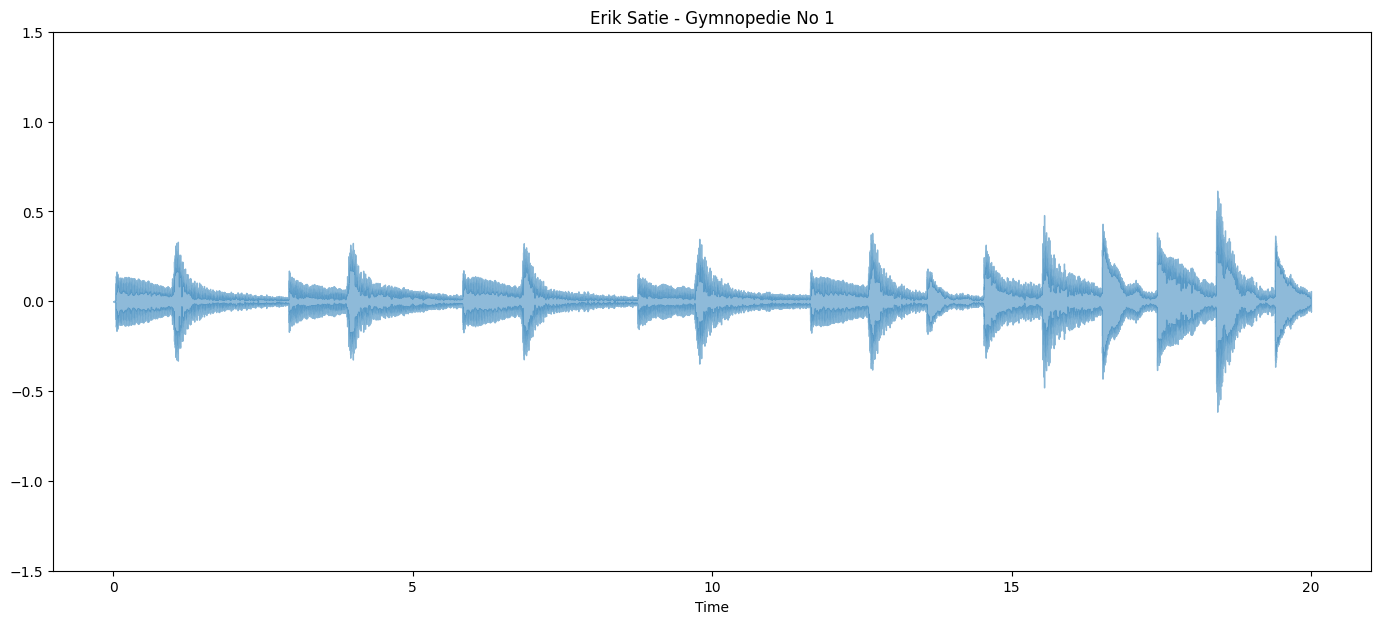

In [8]:
plt.figure(figsize=(17,7))
librosa.display.waveshow(signal, alpha=0.5)
plt.title(NAME)
plt.ylim(-1.5,1.5)
plt.show()

### Extracting Root-Mean Square Energy from the signals

In [9]:
signal_rms = librosa.feature.rms(y=signal, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)[0]

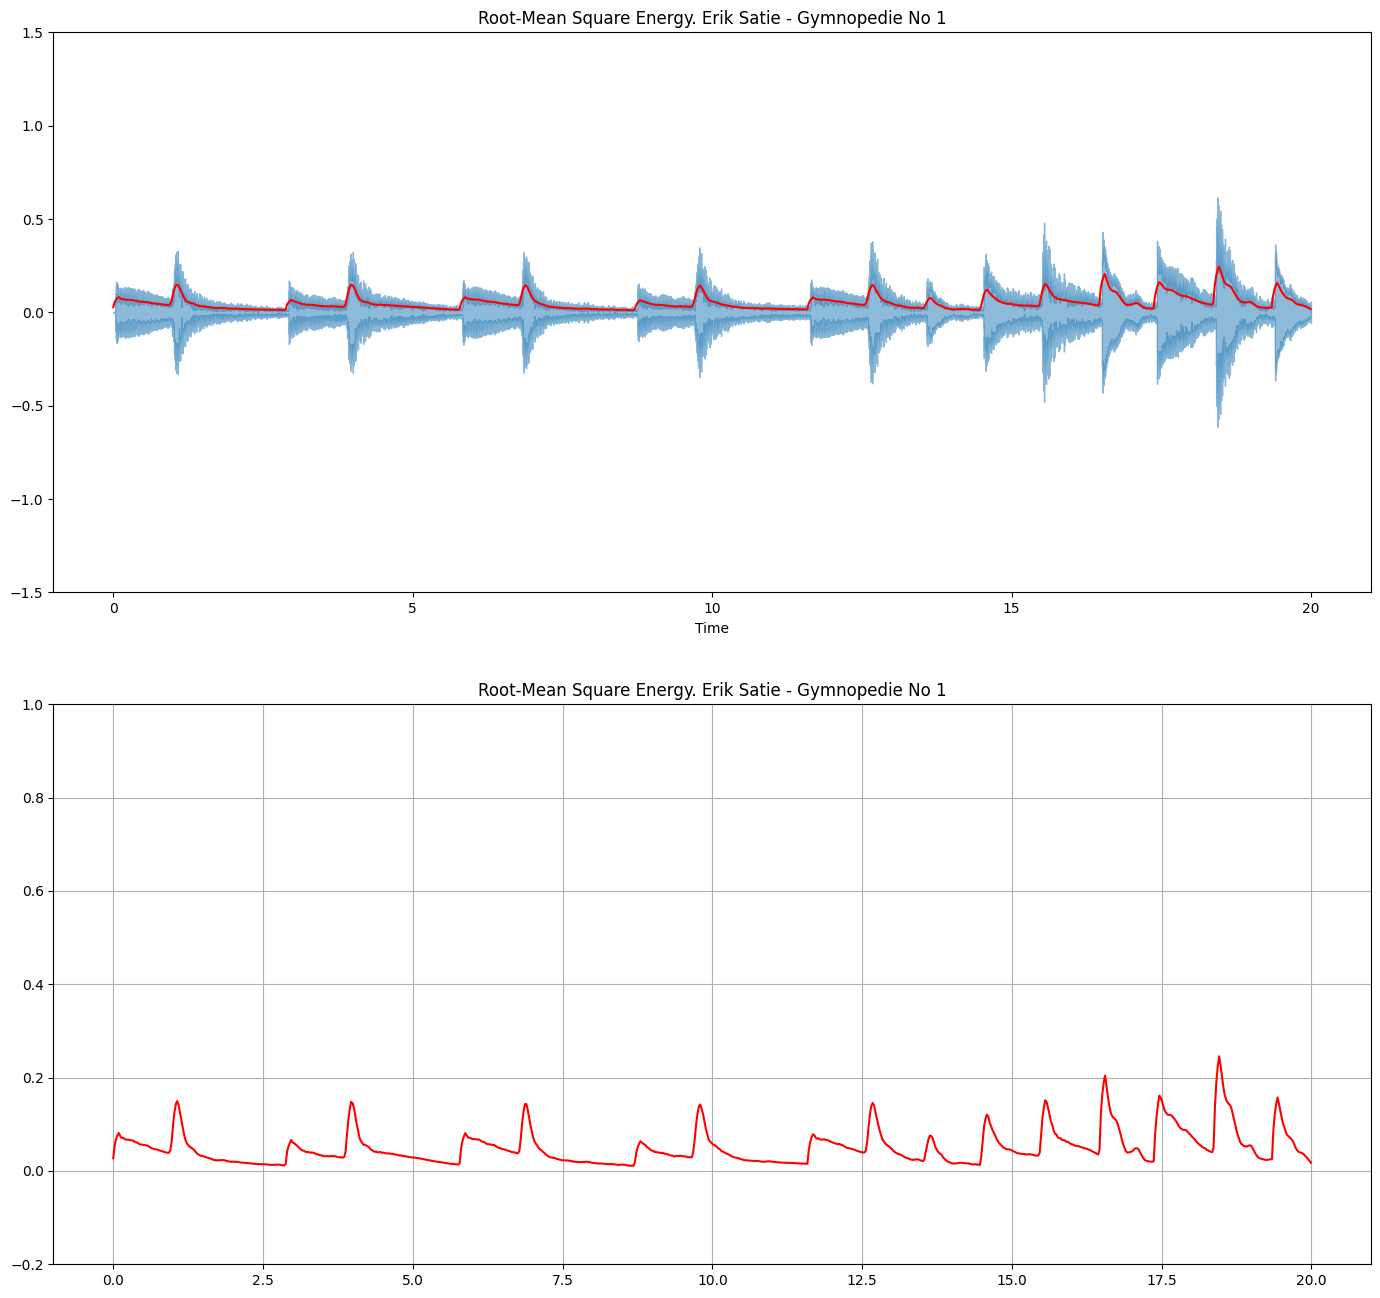

In [10]:
frames = range(0, signal_rms.size)
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(17,16))

plt.subplot(2,1,1)
librosa.display.waveshow(signal, alpha=0.5)
plt.plot(t, signal_rms, color='r')
plt.title("Root-Mean Square Energy. "+NAME)
plt.ylim(-1.5,1.5)

plt.subplot(2,1,2)
plt.plot(t, signal_rms, color='r')
plt.title("Root-Mean Square Energy. "+NAME)
plt.ylim(-0.2,1)
plt.grid()
plt.show()

del signal_rms

### Extracting Zero-crossing rate

In [11]:
signal_zcr = librosa.feature.zero_crossing_rate(y=signal, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)[0]

Text(0.5, 1.0, 'Zero-crossing rate. Erik Satie - Gymnopedie No 1')

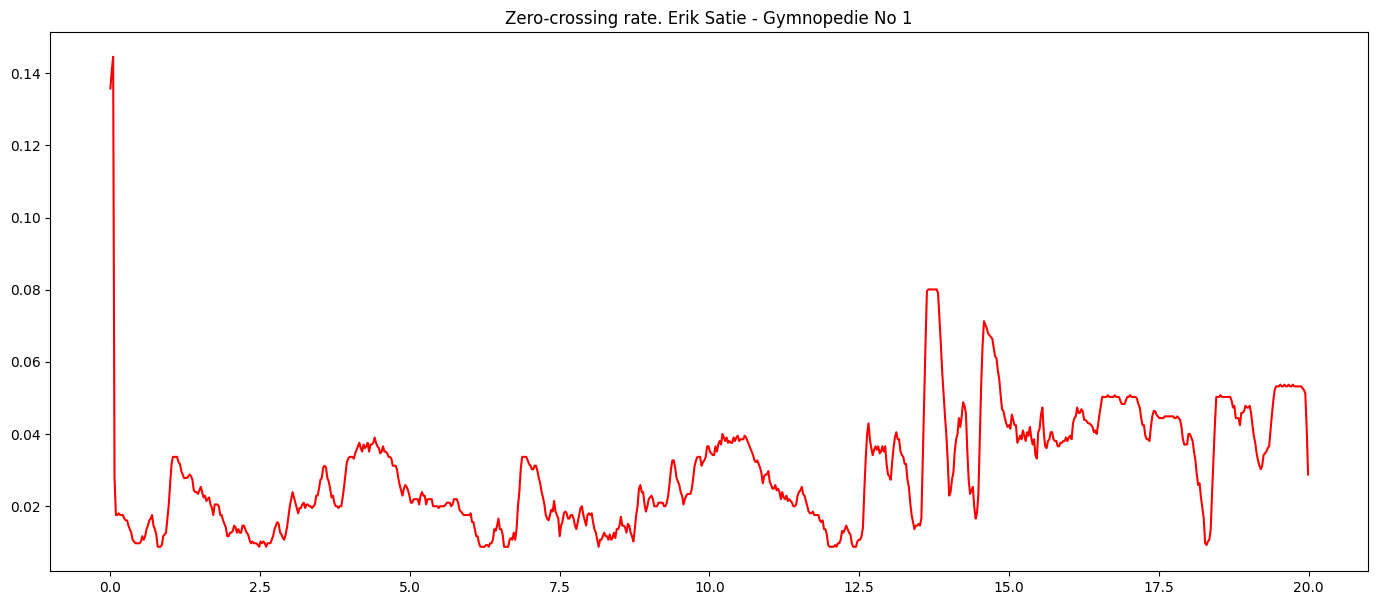

In [12]:
plt.figure(figsize=(17,7))
plt.plot(t, signal_zcr, color='r')
plt.title("Zero-crossing rate. "+NAME)

### Extractiong an Amplitude envelope

In [13]:
def amplitude_evelope(signal, frame_size=FRAME_SIZE, hop_length=HOP_SIZE):
    amplitude_envelope = []
    for sample in range (0, len(signal), hop_length):
        amplitude_envelope.append(max(signal[sample:sample+frame_size]))

    return np.array(amplitude_envelope)

In [14]:
signal_ae = amplitude_evelope(signal)

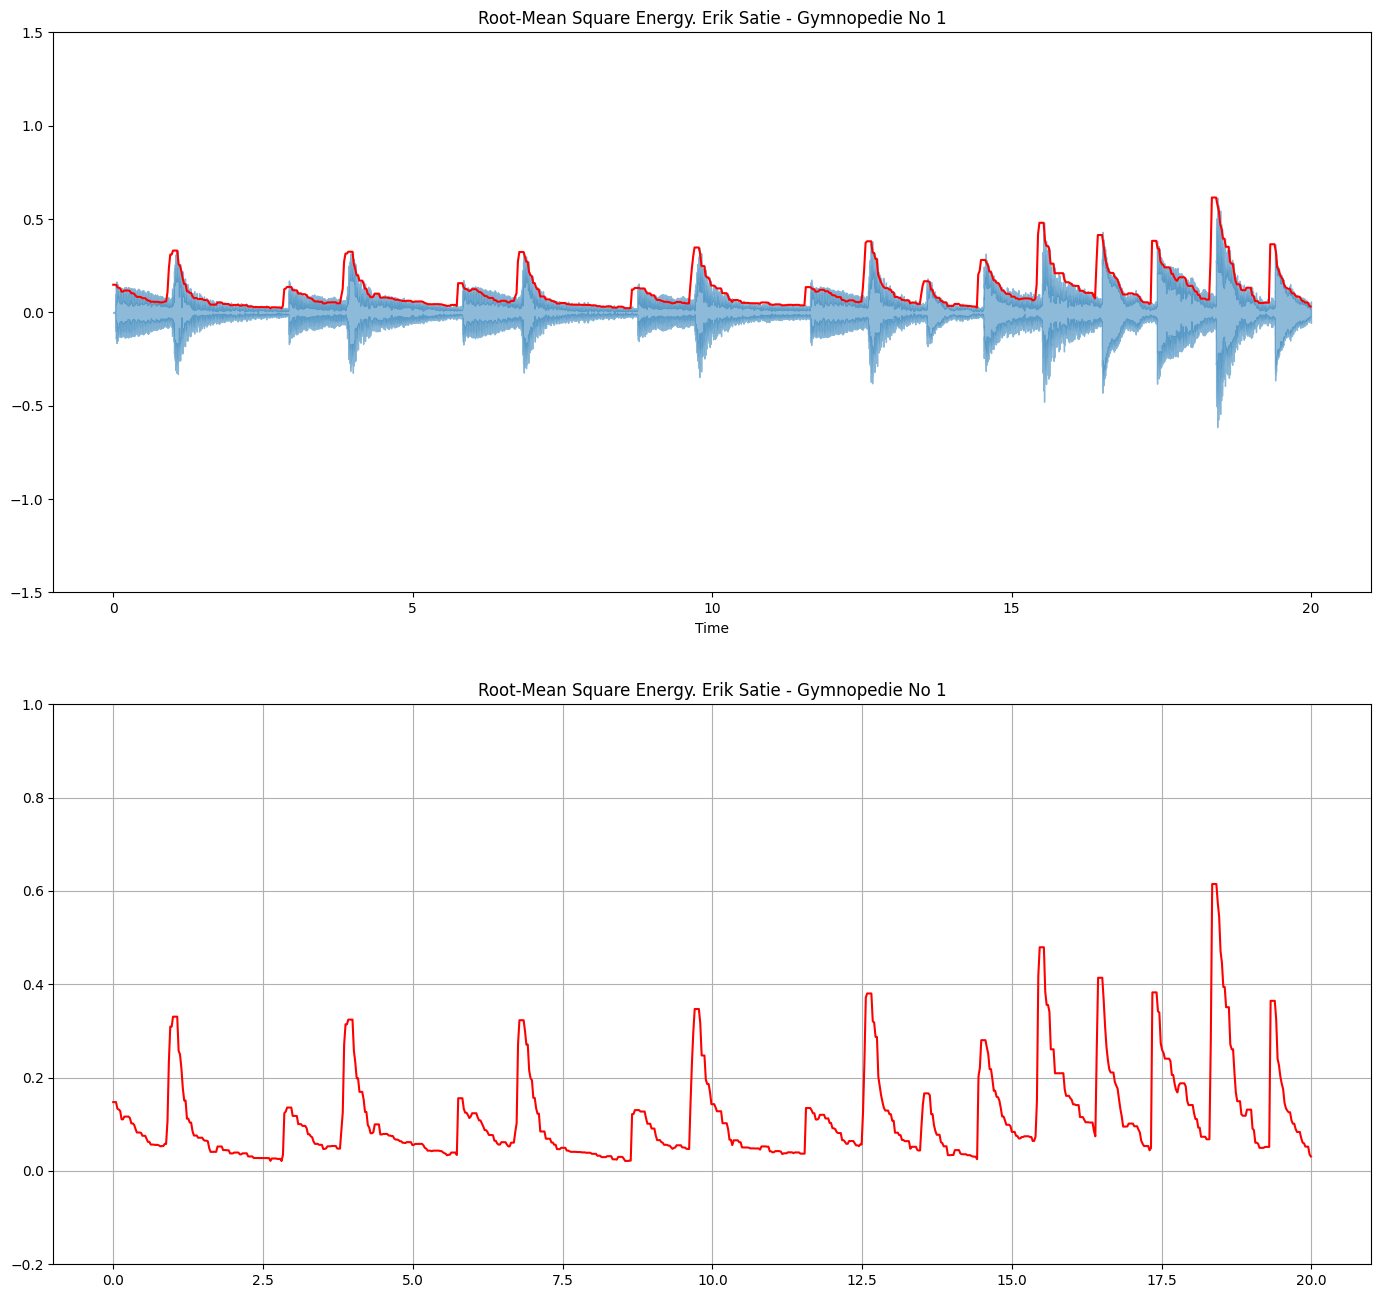

In [15]:
frames = range(0, signal_ae.size)
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(17,16))

plt.subplot(2,1,1)
librosa.display.waveshow(signal, alpha=0.5)
plt.plot(t, signal_ae, color='r')
plt.title("Root-Mean Square Energy. "+NAME)
plt.ylim(-1.5,1.5)

plt.subplot(2,1,2)
plt.plot(t, signal_ae, color='r')
plt.title("Root-Mean Square Energy. "+NAME)
plt.ylim(-0.2,1)
plt.grid()
plt.show()

del signal_ae

### Extracting Discrete Fourier Transform

In [16]:
def plot_magnitude_spectrum(signal, name, sr, f_ration=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    #plot magnitude spectrum
    plt.figure(figsize=(18, 5))
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency)*f_ration)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(name)

    plt.show()

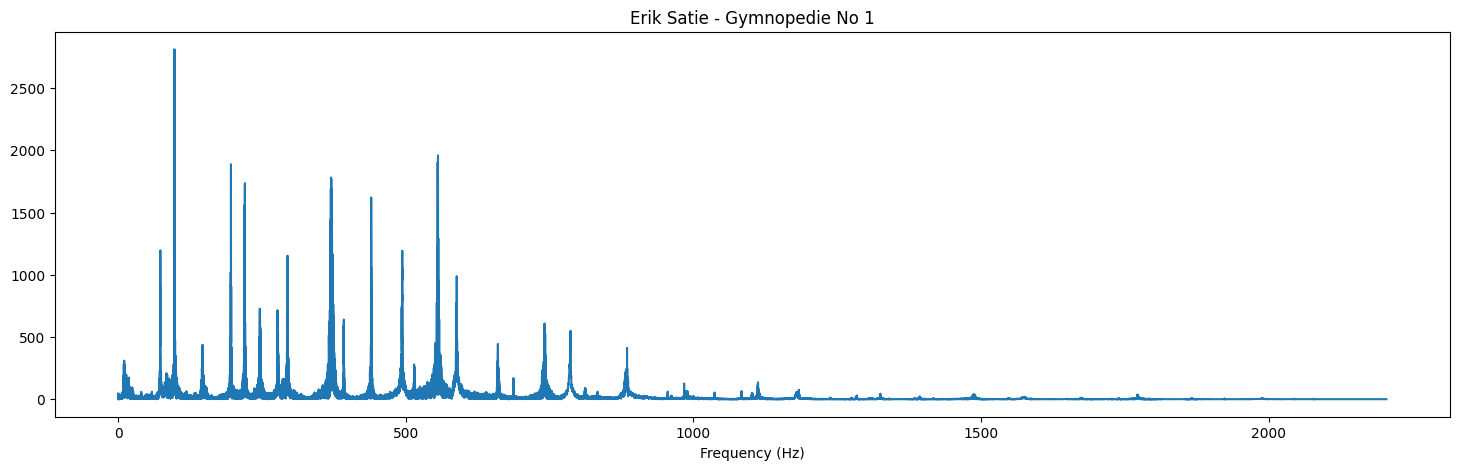

In [17]:
plot_magnitude_spectrum(signal, NAME, sr, f_ration=0.1)

### Extracting Spectrograms

In [18]:
def plot_spectogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f")

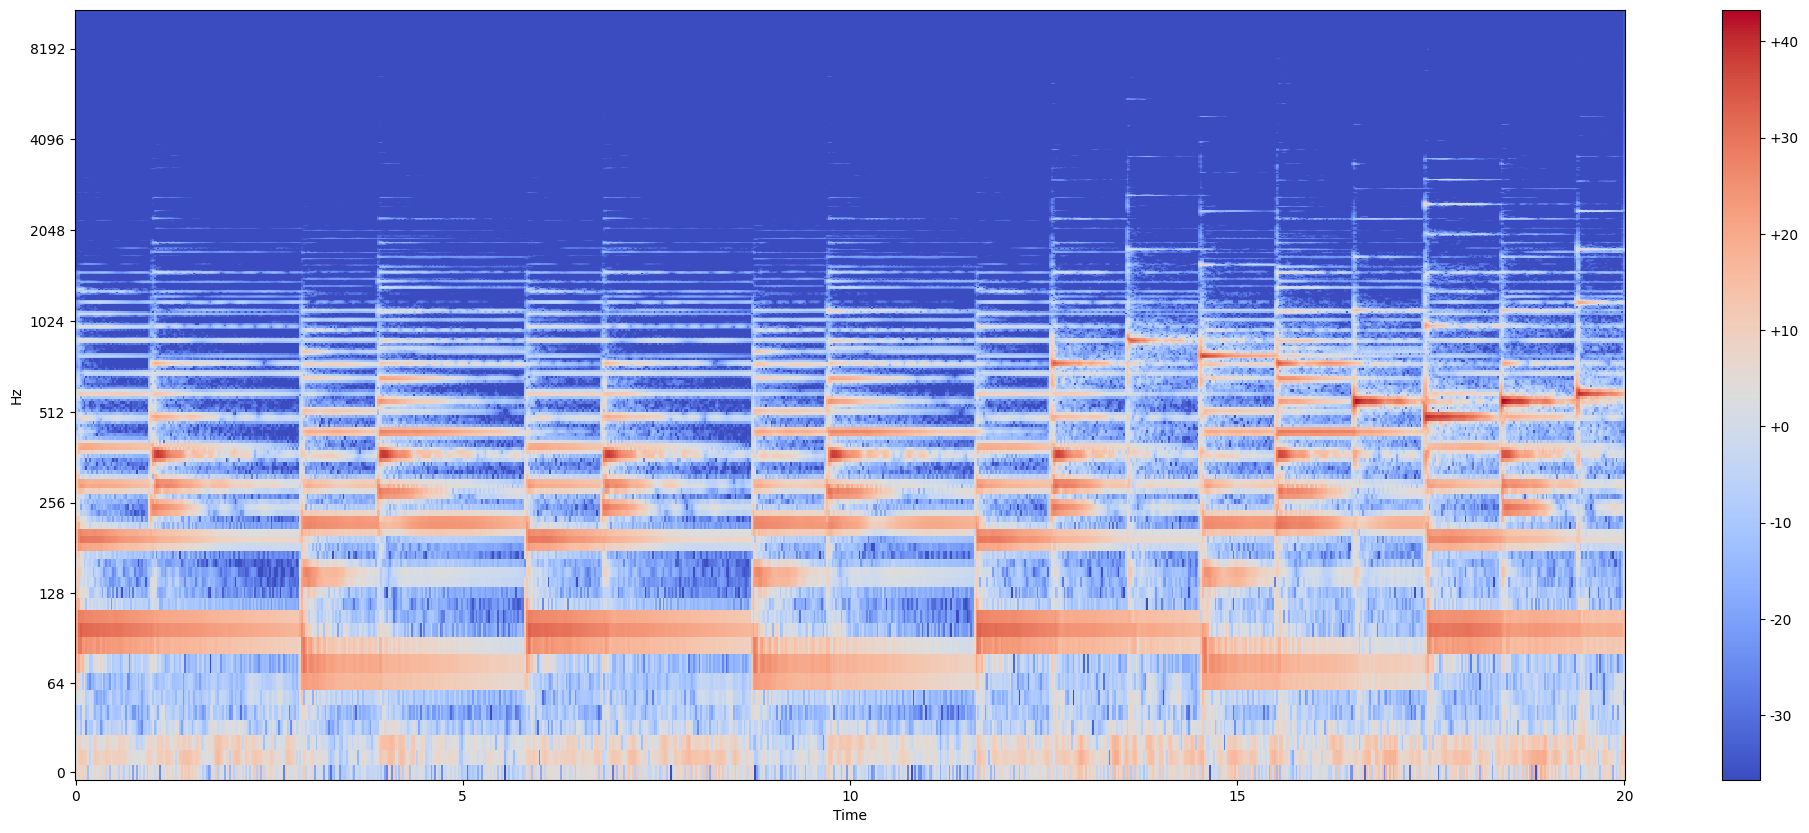

In [19]:
signal_stft = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
signal_y = librosa.power_to_db(np.abs(signal_stft)**2)

plot_spectogram(signal_y, sr, HOP_SIZE, y_axis="log")
del signal_y

### Extracting Mel Spectrograms

#### Mel filter banks

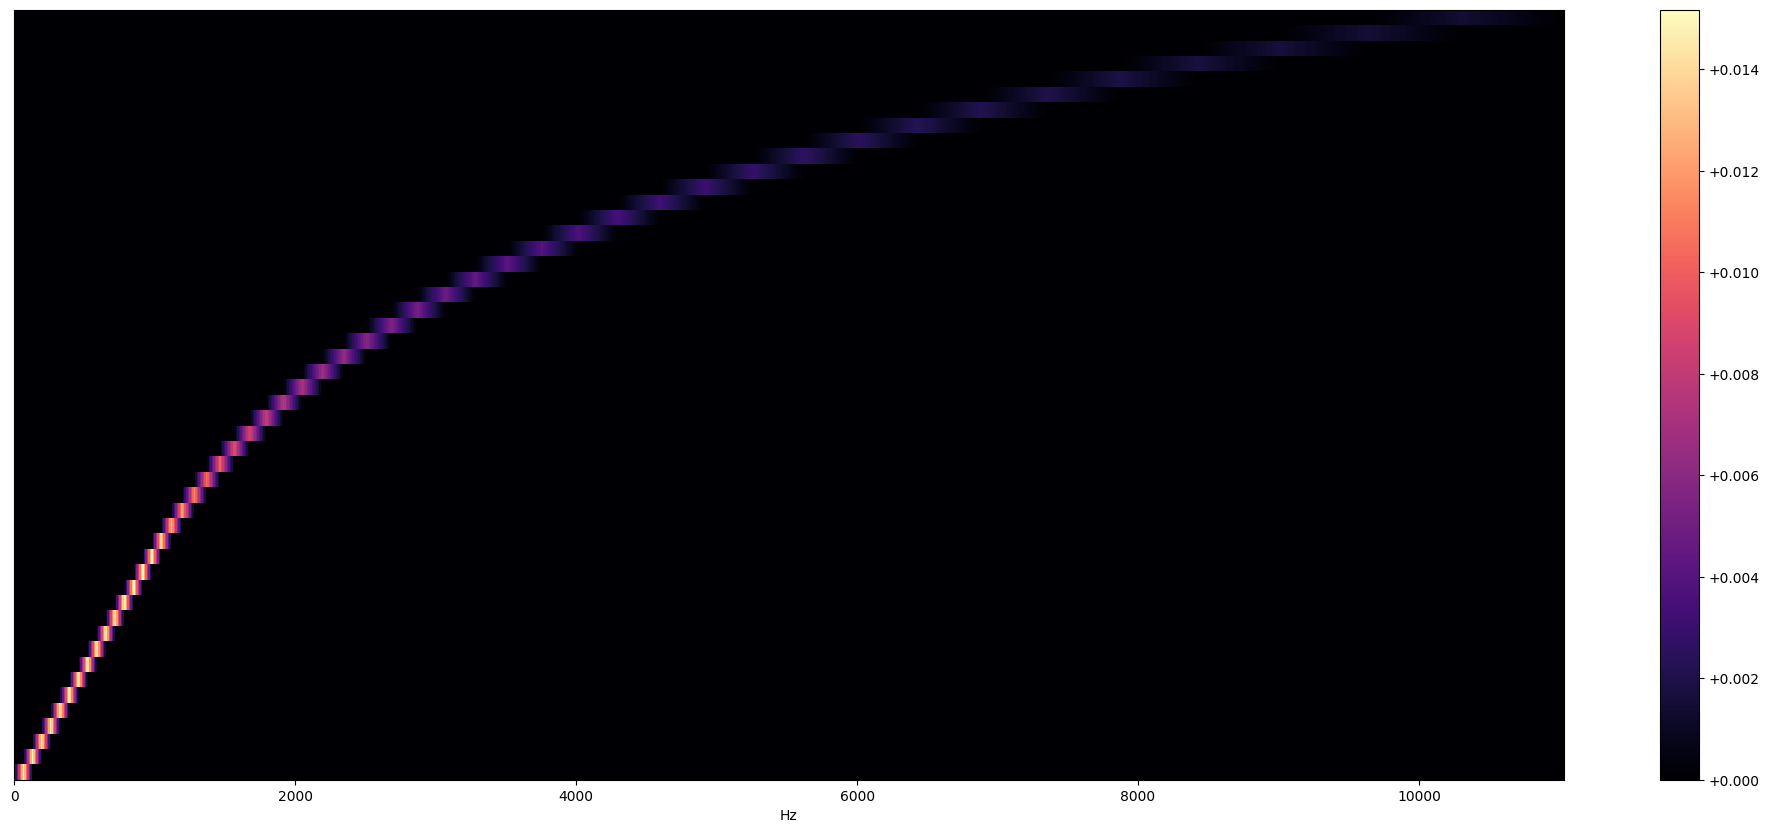

In [20]:
filter_banks = librosa.filters.mel(n_fft=FRAME_SIZE, sr=sr, n_mels=50)
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                        sr=sr,
                        x_axis="linear")
plt.colorbar(format="%+2.3f")
plt.show()
del filter_banks

#### Mel Spectrogram

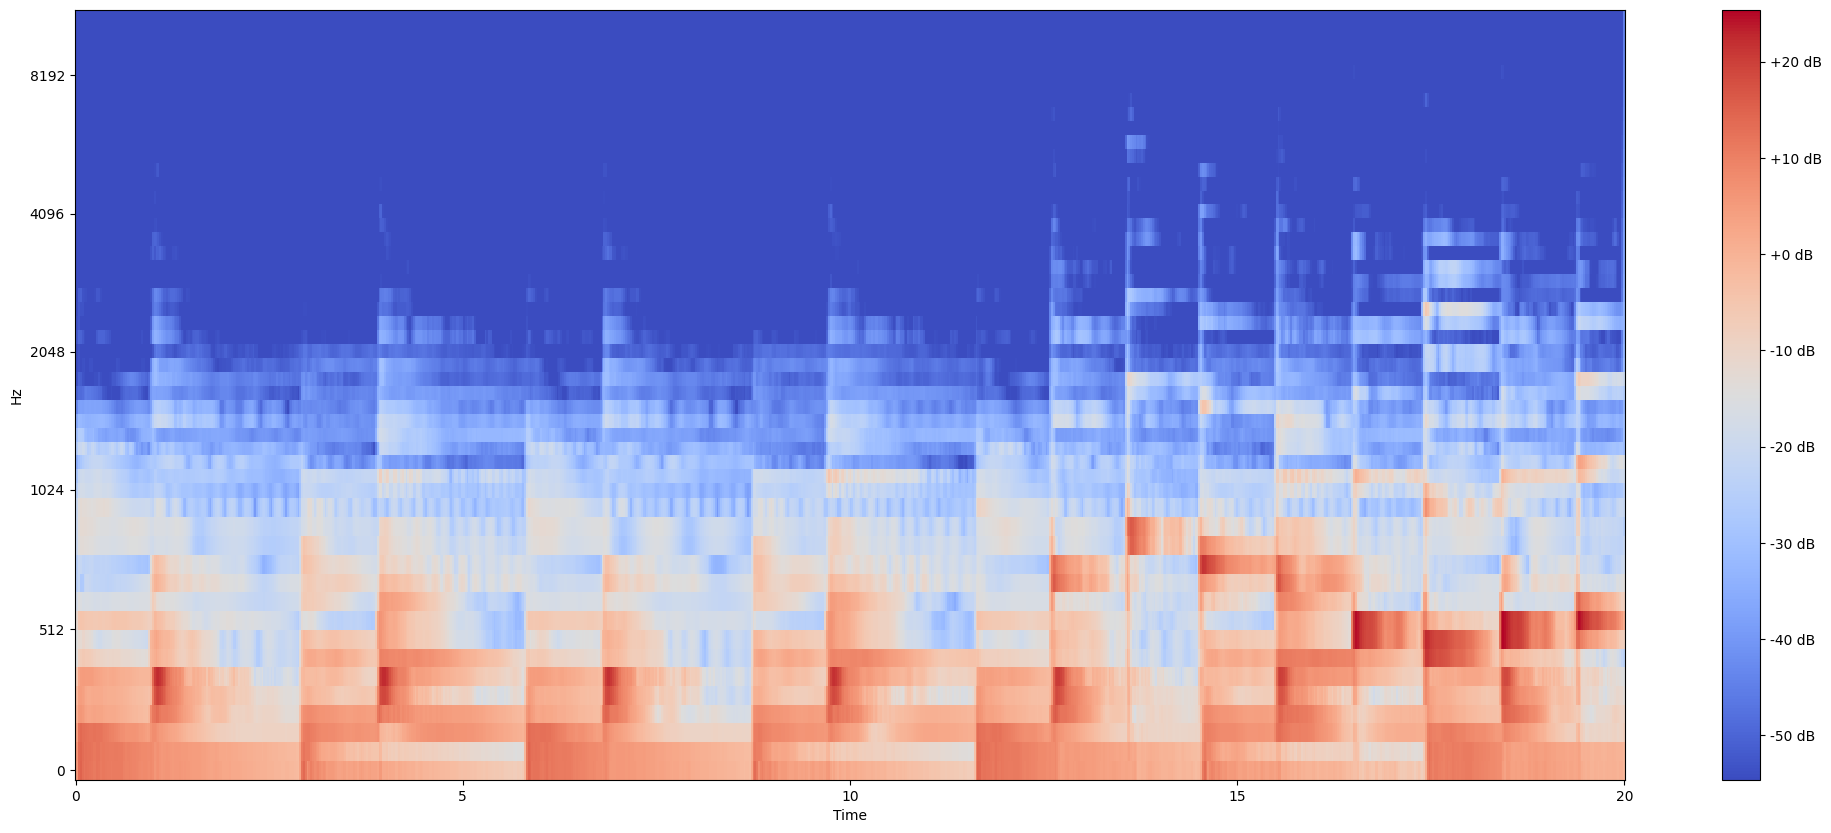

In [21]:
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=50)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                        sr=sr,
                        x_axis="time",
                        y_axis="mel")
plt.colorbar(format="%+2.f dB")
plt.show()
del mel_spectrogram, log_mel_spectrogram

### Extracting Mel-Frequency Cepstral Coefficients

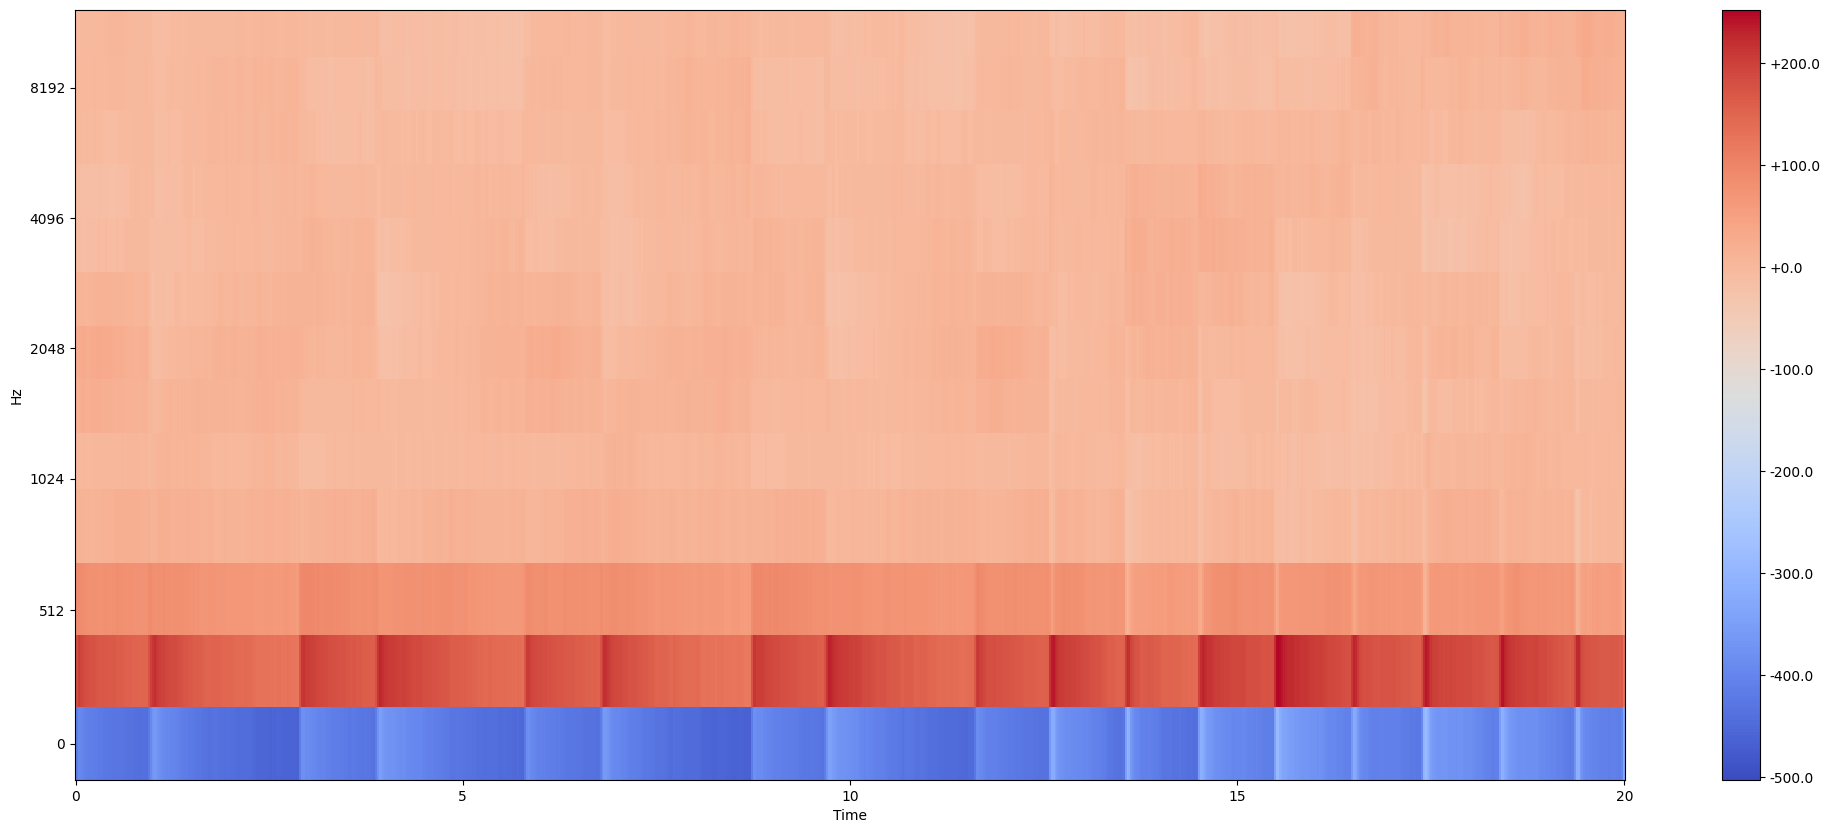

In [22]:
signal_mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

plt.figure(figsize=(25,10))
librosa.display.specshow(signal_mfccs,
                        x_axis="time",
                         y_axis="mel",
                        sr=sr)
plt.colorbar(format="%+2.1f")
plt.show()

#### Calculate delta and delta2 MFCCs

In [23]:
signal_delta_mfccs = librosa.feature.delta(signal_mfccs)
signal_delta2_mfccs = librosa.feature.delta(signal_mfccs, order=2)
del signal_mfccs

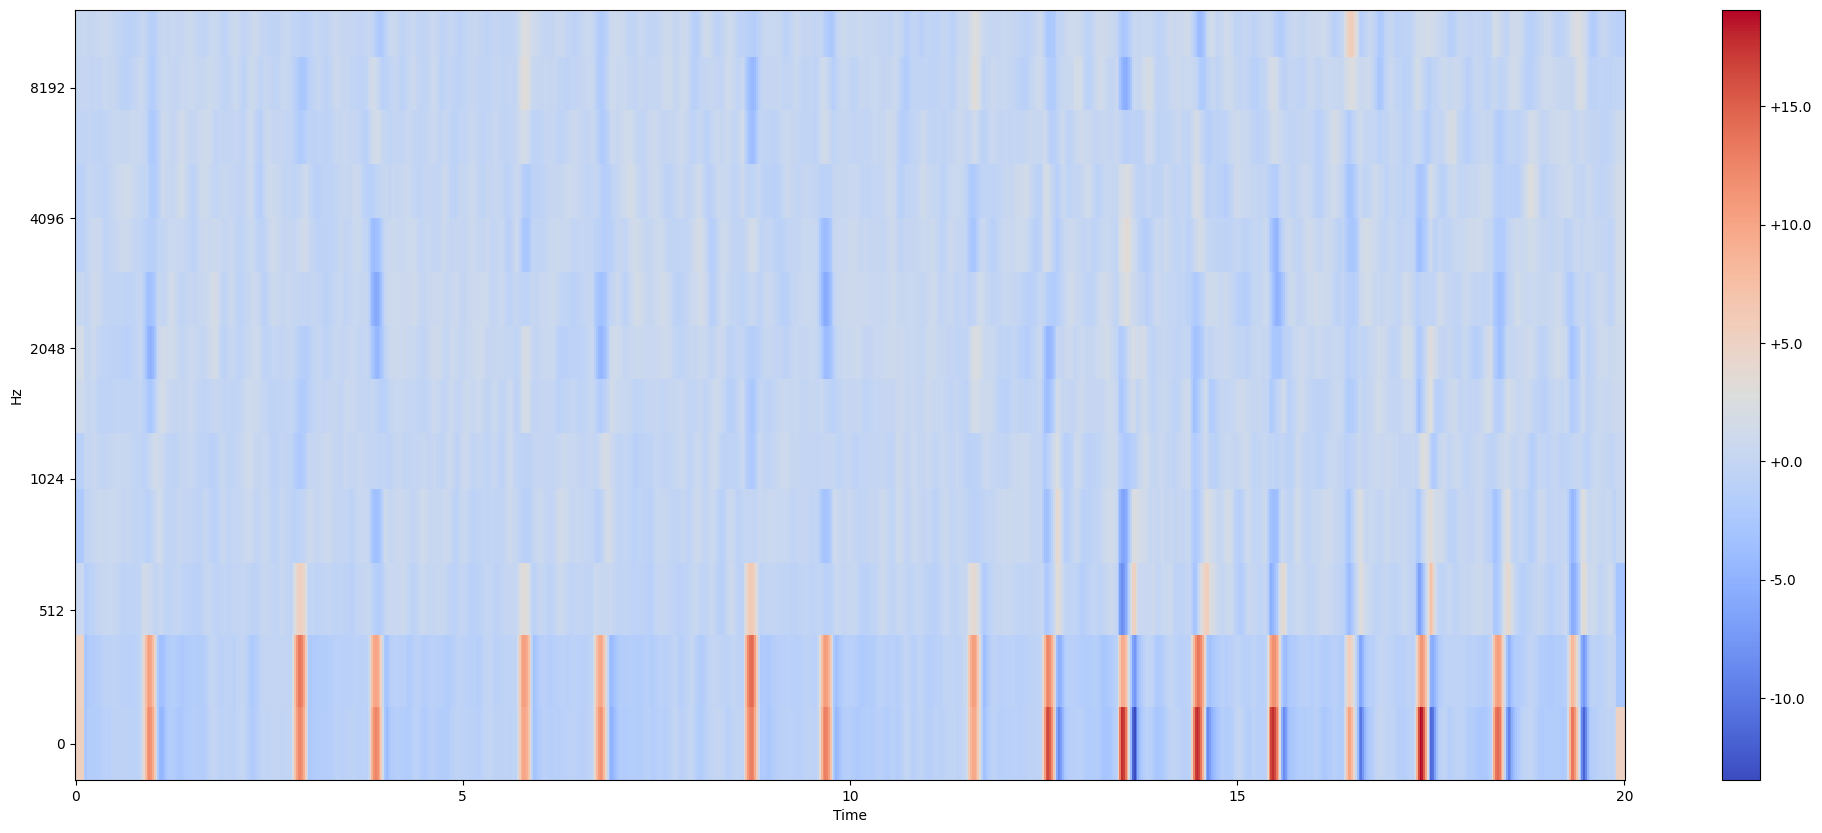

In [24]:
plt.figure(figsize=(25,10))
librosa.display.specshow(signal_delta_mfccs,
                        x_axis="time",
                         y_axis="mel",
                        sr=sr)
plt.colorbar(format="%+2.1f")
plt.show()
del signal_delta_mfccs

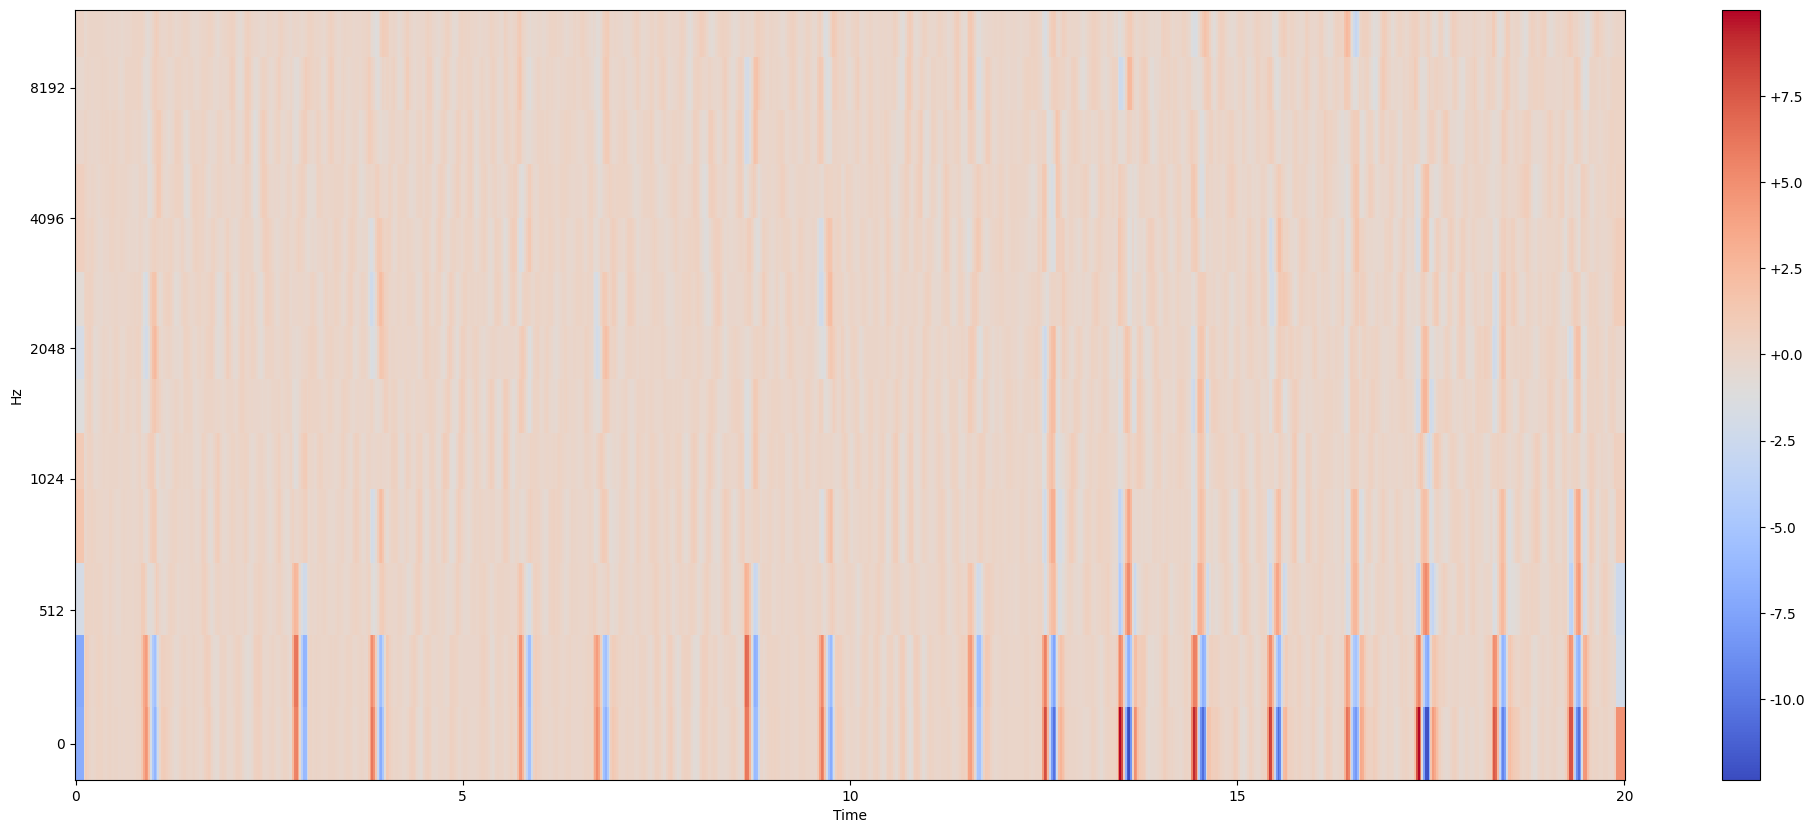

In [25]:
plt.figure(figsize=(25,10))
librosa.display.specshow(signal_delta2_mfccs,
                        x_axis="time",
                         y_axis="mel",
                        sr=sr)
plt.colorbar(format="%+2.1f")
plt.show()
del signal_delta2_mfccs

### Extracting Band Energy Ratio

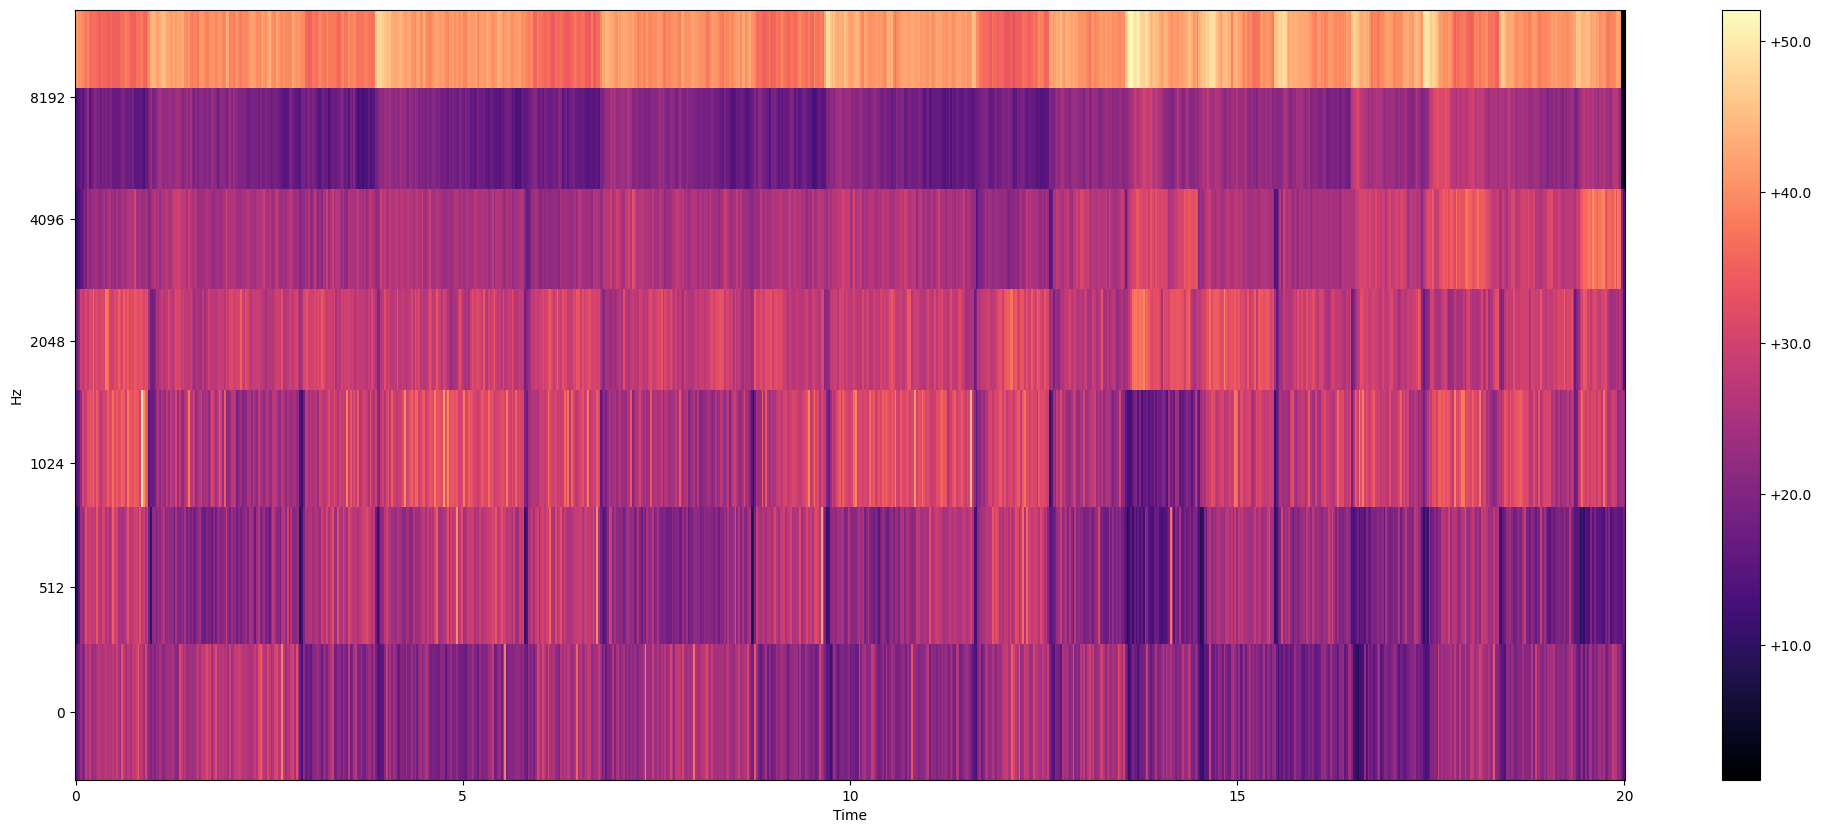

In [26]:
signal_ber = librosa.feature.spectral_contrast(y=signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, sr=sr)

plt.figure(figsize=(25,10))
librosa.display.specshow(signal_ber,
                        x_axis="time",
                         y_axis="mel",
                        sr=sr)
plt.colorbar(format="%+2.1f")
plt.show()
del signal_ber

In [27]:
def band_energy_ratio(spectrogram, split_frequency, sr):
    power_spectrogram = np.abs(spectrogram)**2

    frequencies = librosa.fft_frequencies(sr=sr, n_fft=FRAME_SIZE)
    low_band_mask = frequencies <= split_frequency
    high_band_mask = frequencies > split_frequency

    low_band_energy = power_spectrogram[low_band_mask, :].sum(axis=0)
    high_band_energy = power_spectrogram[high_band_mask, :].sum(axis=0)

    ber = np.divide(low_band_energy, 
                    high_band_energy, 
                    out=np.zeros_like(low_band_energy), 
                    where=high_band_energy != 0)

    return ber

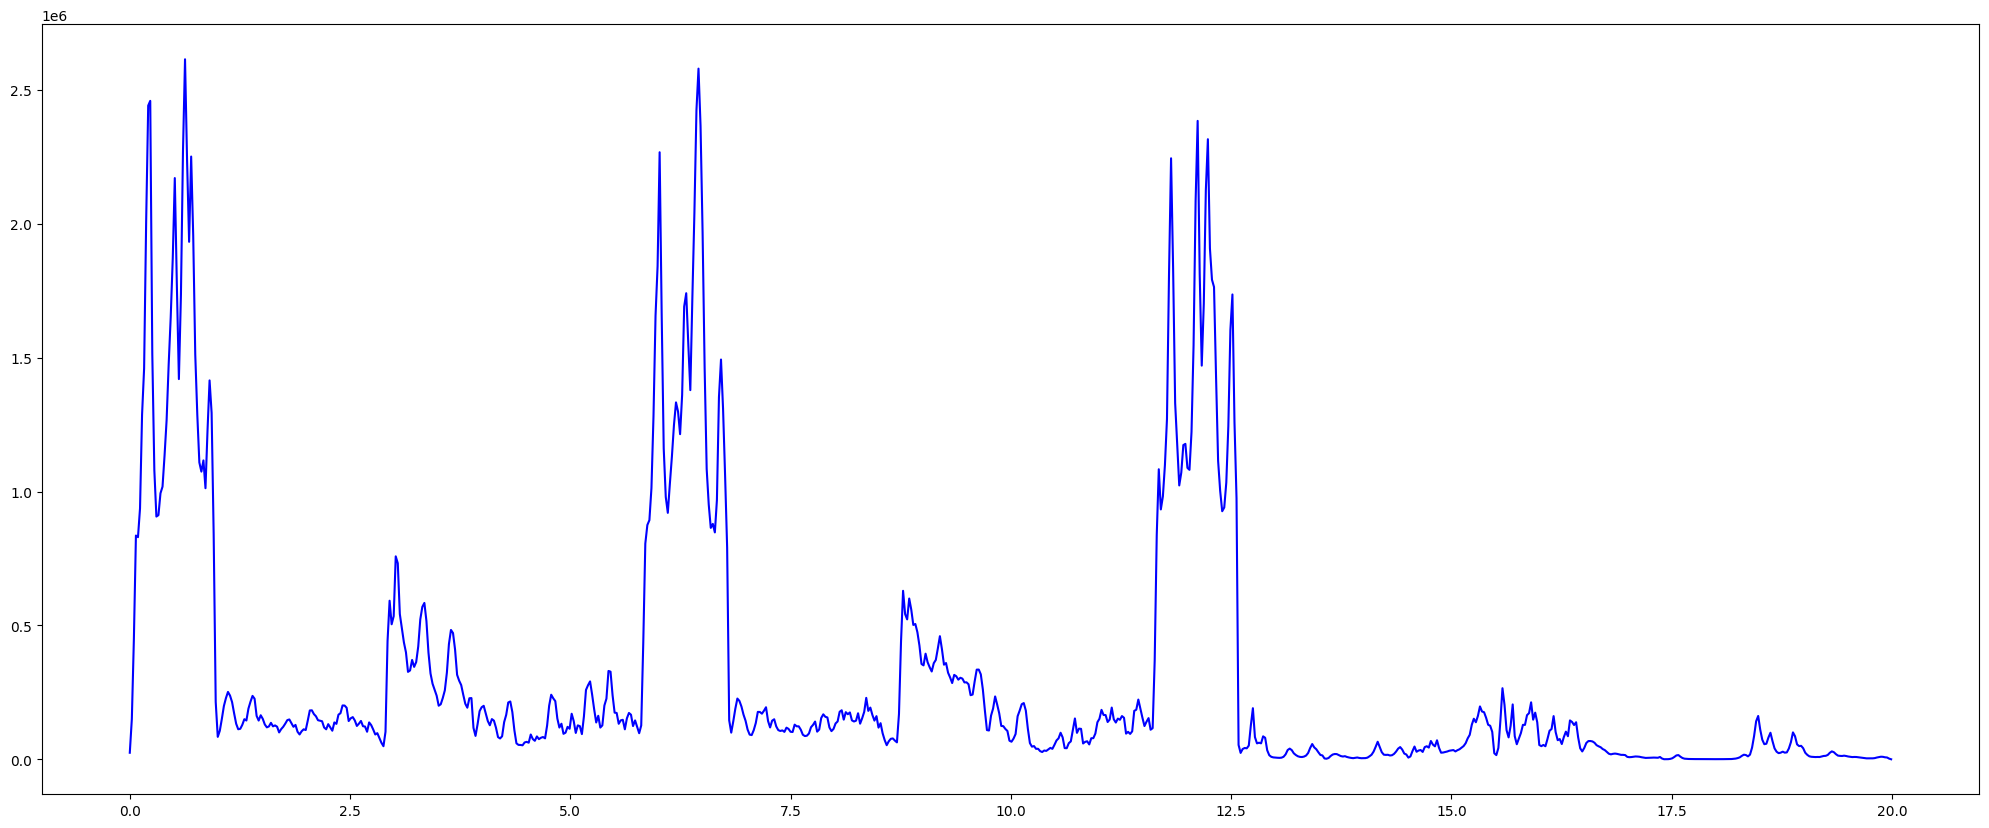

In [28]:
signal_ber = band_energy_ratio(signal_stft, 2000, sr)

frames = range(len(signal_ber))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(25, 10))
plt.plot(t, signal_ber, color="b")
plt.show()
del signal_ber

### Extracting Spectral Centroid

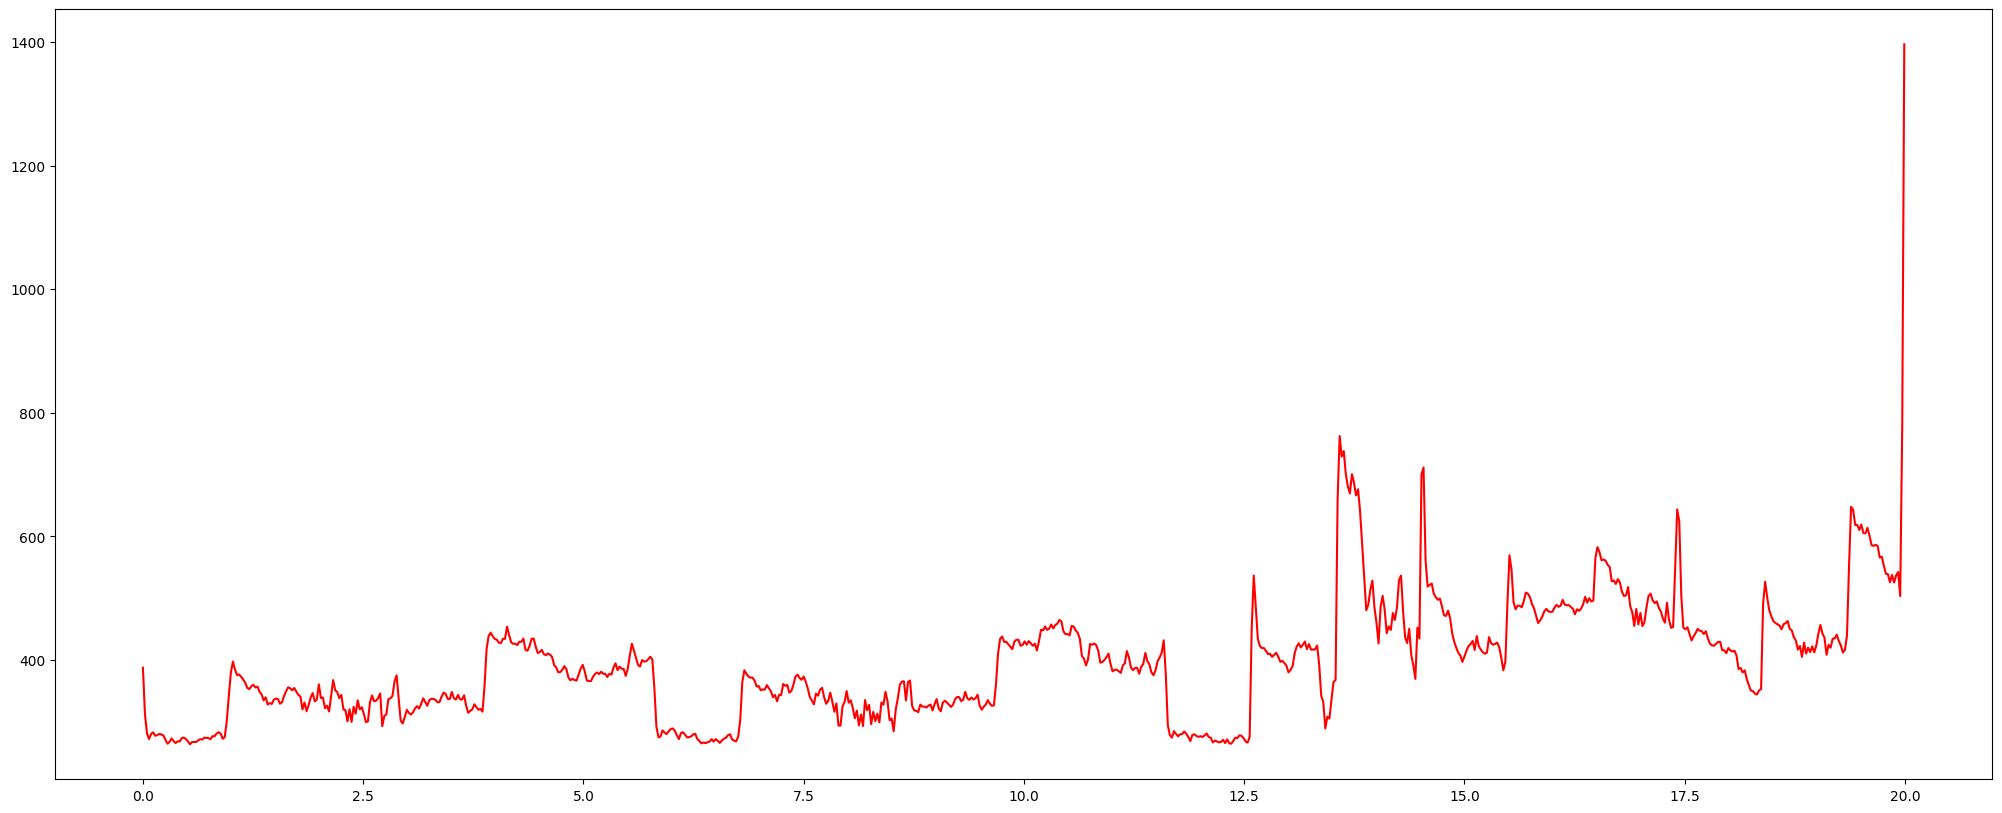

In [29]:
signal_sc = librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

frames = range(len(signal_sc))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(25,10))
plt.plot(t, signal_sc, color='r')
plt.show()
del signal_sc

### Extracting Bandwith

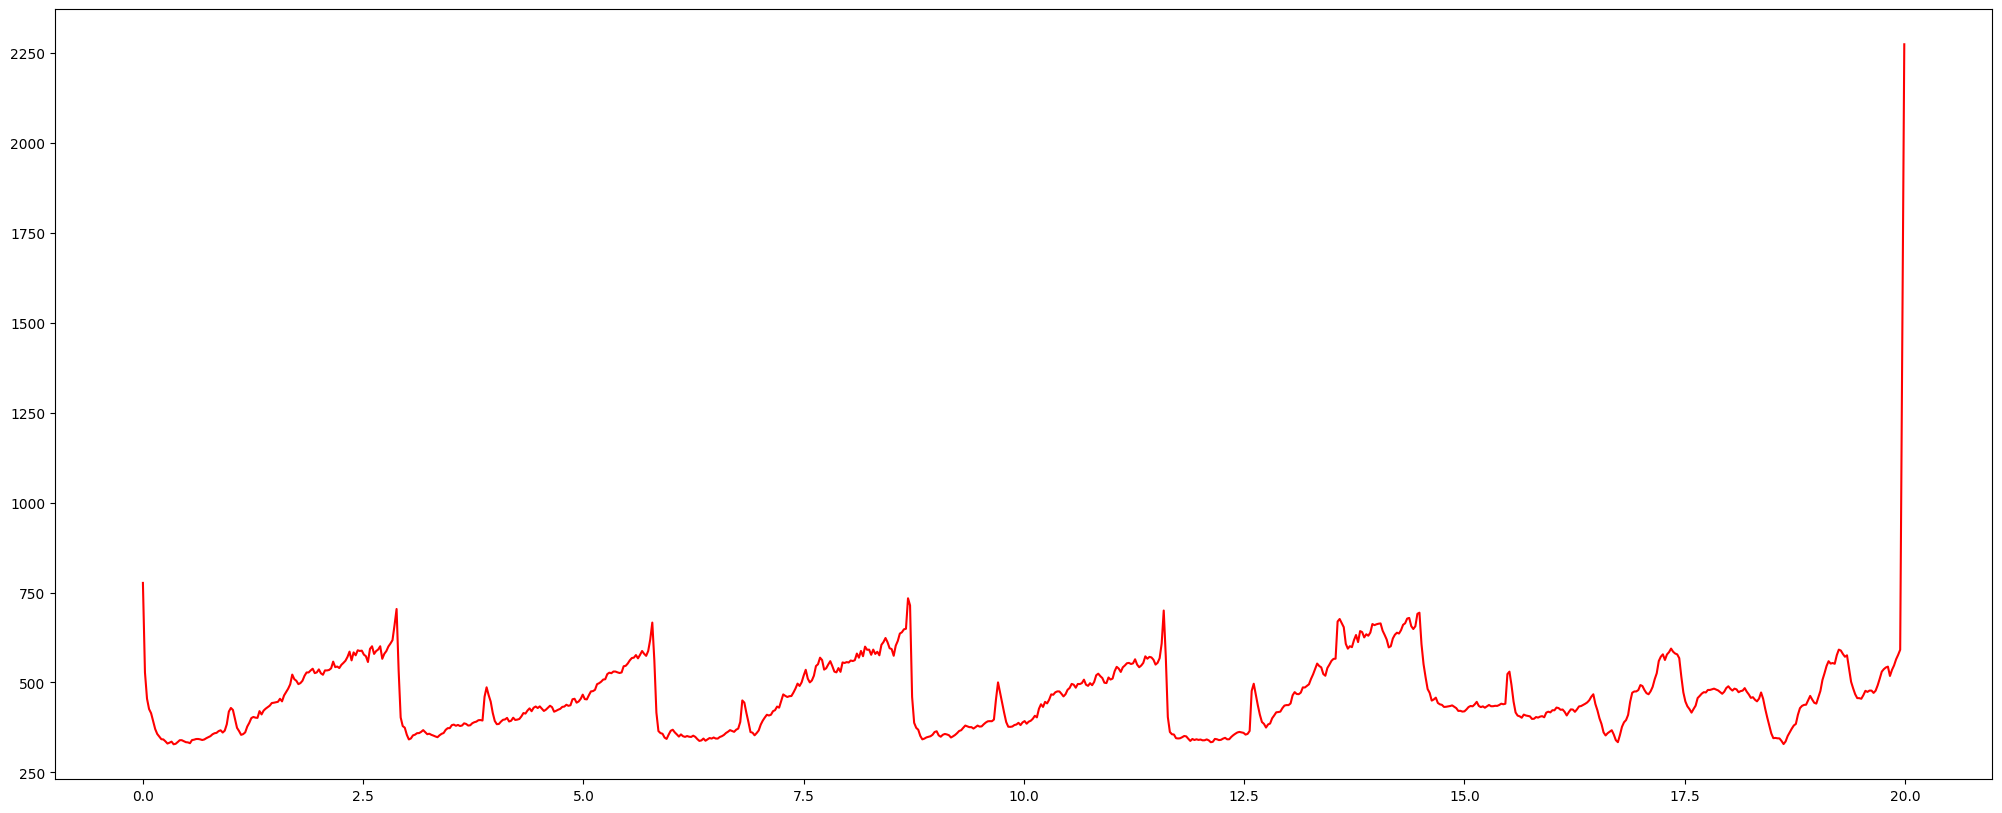

In [30]:
signal_sb = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

plt.figure(figsize=(25,10))
plt.plot(t, signal_sb, color='r')
plt.show()
del signal_sb